In [1]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense

In [3]:
!pip install simpletransformers

ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import json


def jsonl_to_dataframe(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            entry = json.loads(line.strip())
            data.append(entry)

    df = pd.DataFrame(data)
    return df

file_path = '/content/Drive/MyDrive/Datasets/Datasets/SemEval/subtaskA_train_monolingual.jsonl'
df = jsonl_to_dataframe(file_path)

df.head()

,text,label,model,source,id
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119757 entries, 0 to 119756
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    119757 non-null  object
 1   label   119757 non-null  int64 
 2   model   119757 non-null  object
 3   source  119757 non-null  object
 4   id      119757 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
df.shape

(119757, 5)

In [ ]:
df.nunique(axis=0)

text      119757
label          2
model          5
source         5
id        119757
dtype: int64

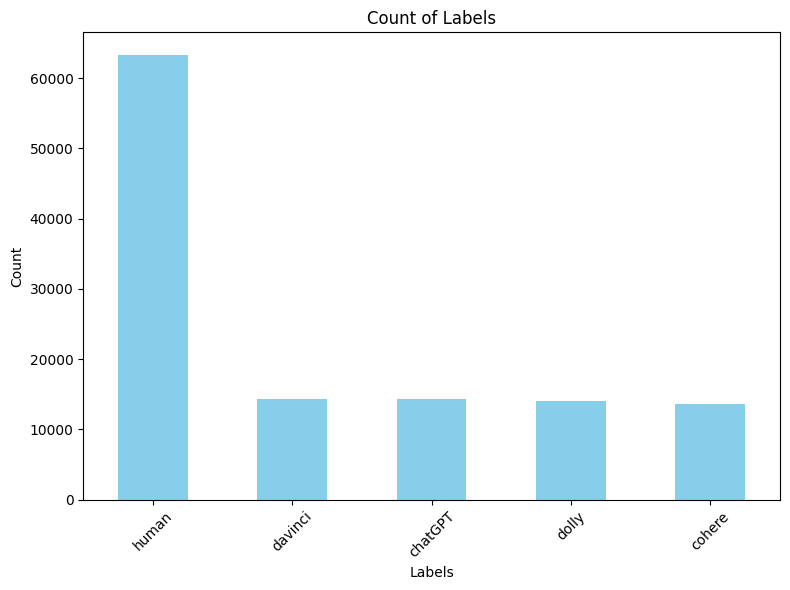

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

label_counts = df['model'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


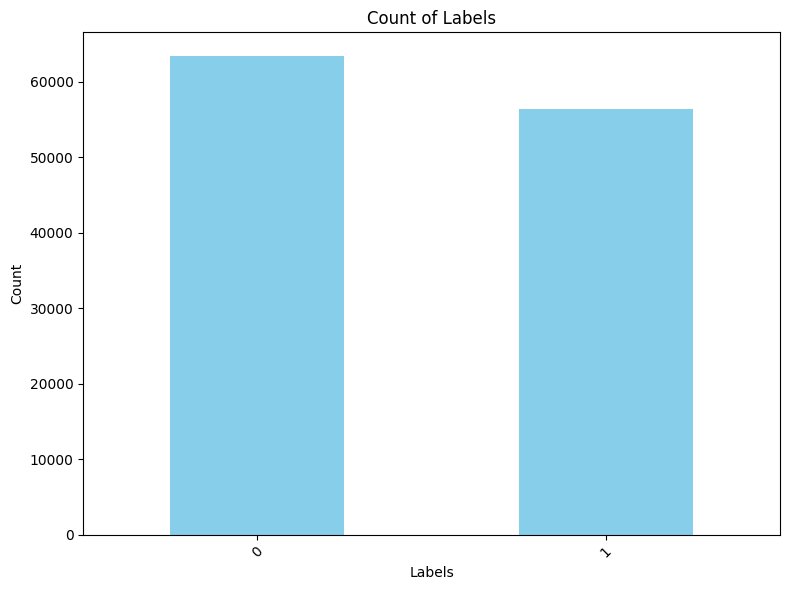

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
X = df['text']
y = df['label']

## Approach 1 - Vectorized input to ANN

In [ ]:
vectorizer = CountVectorizer(max_features=50)  # Limiting to 50 features as mentioned in your paper
X_vectors = vectorizer.fit_transform(X).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=70, validation_split=0.1)

Epoch 1/5
1232/1232 [==============================] - 8s 4ms/step - loss: 0.4926 - accuracy: 0.7578 - val_loss: 0.4767 - val_accuracy: 0.7651
Epoch 2/5
1232/1232 [==============================] - 6s 5ms/step - loss: 0.4295 - accuracy: 0.7963 - val_loss: 0.4206 - val_accuracy: 0.7991
Epoch 3/5
1232/1232 [==============================] - 5s 4ms/step - loss: 0.3999 - accuracy: 0.8129 - val_loss: 0.4081 - val_accuracy: 0.8144
Epoch 4/5
1232/1232 [==============================] - 5s 4ms/step - loss: 0.3799 - accuracy: 0.8244 - val_loss: 0.3992 - val_accuracy: 0.8137
Epoch 5/5
1232/1232 [==============================] - 5s 4ms/step - loss: 0.3666 - accuracy: 0.8324 - val_loss: 0.3961 - val_accuracy: 0.8146


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

749/749 [==============================] - 2s 2ms/step - loss: 0.3897 - accuracy: 0.8211


In [ ]:
import joblib

joblib.dump(model, 'ann.pkl')

['ann.pkl']

In [ ]:
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8211422562599182


In [ ]:
import pandas as pd
import json


def jsonl_to_dataframe(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            entry = json.loads(line.strip())
            data.append(entry)

    df = pd.DataFrame(data)
    return df

file_path = '/content/Drive/MyDrive/Datasets/Datasets/SemEval/subtaskA_monolingual.jsonl'
df = jsonl_to_dataframe(file_path)

df.head()

,text,label,id
0,"Today, many adults or teenage drivers are hook...",0,0
1,"The automobile, since its advent, has revoluti...",1,1
2,One policy that could potentially improve aca...,1,2
3,Title: Navigating the Road Ahead: The Case for...,1,3
4,Have you ever woken up in the morning and wish...,0,4


In [ ]:
import joblib

model = joblib.load('/content/Drive/MyDrive/Datasets/Datasets/SemEval/ann.pkl')

In [ ]:
x_test, y_test = df['text'], df['label']

In [ ]:
vectorizer = CountVectorizer(max_features=50)

X_values = vectorizer.fit_transform(x_test).toarray()

In [ ]:
y_pred = model.predict(X_values)
y_pred

1071/1071 [==============================] - 2s 2ms/step


array([[0.2298014 ],
       [0.89126533],
       [0.99997145],
       ...,
       [0.988646  ],
       [0.04001502],
       [0.9876125 ]], dtype=float32)

In [ ]:
binary_predictions = (y_pred > 0.5).astype('int32')

# ann test

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['label'].tolist(), binary_predictions))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58     16272
           1       0.64      0.92      0.76     18000

    accuracy                           0.69     34272
   macro avg       0.74      0.68      0.67     34272
weighted avg       0.73      0.69      0.67     34272



### Task A testing

In [ ]:
import pandas as pd
import json


def jsonl_to_dataframe(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            entry = json.loads(line.strip())
            data.append(entry)

    df = pd.DataFrame(data)
    return df

file_path = '/content/SemEval2024-Task8-test/subtaskA_monolingual.jsonl'
data = jsonl_to_dataframe(file_path)

data

,text,id
0,"Today, many adults or teenage drivers are hook...",0
1,"The automobile, since its advent, has revoluti...",1
2,One policy that could potentially improve aca...,2
3,Title: Navigating the Road Ahead: The Case for...,3
4,Have you ever woken up in the morning and wish...,4
...,...,...
34267,There are many advantages of limiting car usag...,34267
34268,When discussing the merits of the electoral co...,34268
34269,In favor of student-designed summer assignment...,34269
34270,"No, FACE is not created by aliens. as a person...",34270


In [ ]:
x_test = data['text']

In [ ]:
X_values = vectorizer.fit_transform(x_test).toarray()

In [ ]:
y_pred = model.predict(X_values)
y_pred

1071/1071 [==============================] - 2s 2ms/step


array([[0.02165726],
       [0.34788585],
       [0.99994886],
       ...,
       [0.92137104],
       [0.01339815],
       [0.9952898 ]], dtype=float32)

In [ ]:
binary_predictions = (y_pred > 0.5).astype('int32')

In [ ]:
data['label'] = binary_predictions
data

,text,id,label
0,"Today, many adults or teenage drivers are hook...",0,0
1,"The automobile, since its advent, has revoluti...",1,0
2,One policy that could potentially improve aca...,2,1
3,Title: Navigating the Road Ahead: The Case for...,3,1
4,Have you ever woken up in the morning and wish...,4,0
...,...,...,...
34267,There are many advantages of limiting car usag...,34267,0
34268,When discussing the merits of the electoral co...,34268,1
34269,In favor of student-designed summer assignment...,34269,1
34270,"No, FACE is not created by aliens. as a person...",34270,0


## Approach 2 - Bert Binary Classification

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
import pandas as pd
import json


def jsonl_to_dataframe(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            entry = json.loads(line.strip())
            data.append(entry)

    df = pd.DataFrame(data)
    return df

file_path = '/content/Drive/MyDrive/Datasets/Datasets/SemEval/subtaskA_train_monolingual.jsonl'
df = jsonl_to_dataframe(file_path)

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Drive/MyDrive/Datasets/Datasets/SemEval/subtaskA_train_monolingual.jsonl'

In [ ]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
X_train

,text,label,model,source,id
69365,This lightening spray calls for dried chamomi...,0,human,wikihow,69365
113114,We consider the problem of mass transport cl...,0,human,arxiv,113114
47161,"\nThe paper ""Learning to Skim Text"" presents a...",1,cohere,peerread,47161
38209,Tesla's solar shingles and Powerwall are innov...,1,chatGPT,reddit,38209
1368,Have you accidentally dropped your precious iP...,1,chatGPT,wikihow,1368
...,...,...,...,...,...
76820,"Josephine ""Joyce"" Luther Kennard (born May 6, ...",0,human,wikipedia,76820
110268,The fractional Brownian motion with index $\...,0,human,arxiv,110268
103694,"Strictly subadditive, subadditive and weakly...",0,human,arxiv,103694
860,How to Get Into UPenn: Excelling Academically ...,1,chatGPT,wikihow,860


In [ ]:
X_test

,text,label,model,source,id
32026,"Babies are incredibly special, with an incredi...",1,davinci,reddit,32026
60190,A child doesn’t change anything about their n...,0,human,wikihow,60190
58257,Use two different alarms; one with a loud bee...,0,human,wikihow,58257
27604,\n\nA DJ mix set is a seamless mix of songs th...,1,cohere,wikihow,27604
98887,"Generally speaking, a computer will slow down ...",0,human,reddit,98887
...,...,...,...,...,...
91934,It sounds like there might be a lot of aspects...,0,human,reddit,91934
67718,Base-period wages cover the first four of the...,0,human,wikihow,67718
48730,This paper describes a method to extend the co...,1,dolly,peerread,48730
3721,"\n\nA reality TV show is a TV show that is, in...",1,cohere,wikihow,3721


In [ ]:
model_args = ClassificationArgs(num_train_epochs=5)

model = ClassificationModel(
    "roberta", "roberta-base", args=model_args
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
model.train_model(X_train)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:608: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/191 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

(59880, 0.0899124997402787)

In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

# ROBERTA BINARY CLASSIFICATION TEST

In [4]:
import joblib

model = joblib.load('/content/Drive/MyDrive/Datasets/Sem Eval/model.pkl')

In [6]:
import pandas as pd
import json


def jsonl_to_dataframe(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            entry = json.loads(line.strip())
            data.append(entry)

    df = pd.DataFrame(data)
    return df

file_path = '/content/Drive/MyDrive/Datasets/Sem Eval/subtaskA_monolingual.jsonl'
df = jsonl_to_dataframe(file_path)

df.head()

,text,label,id
0,"Today, many adults or teenage drivers are hook...",0,0
1,"The automobile, since its advent, has revoluti...",1,1
2,One policy that could potentially improve aca...,1,2
3,Title: Navigating the Road Ahead: The Case for...,1,3
4,Have you ever woken up in the morning and wish...,0,4


In [10]:
df1 = df[['text', 'label']]

In [11]:
result, model_outputs, wrong_predictions = model.eval_model(df1)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/68 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/343 [00:00<?, ?it/s]

In [12]:
result

{'mcc': 0.72940450984285,
 'accuracy': 0.8635329131652661,
 'f1_score': 0.8653209318397789,
 'tp': 15025,
 'tn': 14570,
 'fp': 1702,
 'fn': 2975,
 'auroc': 0.9180083562083471,
 'auprc': 0.9412884580233633,
 'eval_loss': 1.0832358125173662}

roberta test

In [15]:
from sklearn.metrics import classification_report
import numpy as np

print(classification_report(np.argmax(model_outputs, axis = 1), df1.label.values))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17545
           1       0.83      0.90      0.87     16727

    accuracy                           0.86     34272
   macro avg       0.87      0.86      0.86     34272
weighted avg       0.87      0.86      0.86     34272



# Approach 3 - BERT for Binary Classification

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
import pandas as pd
import json


def jsonl_to_dataframe(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            entry = json.loads(line.strip())
            data.append(entry)

    df = pd.DataFrame(data)
    return df

file_path = '/content/Drive/MyDrive/Datasets/Datasets/SemEval/subtaskA_train_monolingual.jsonl'
df = jsonl_to_dataframe(file_path)

df.head()

,text,label,model,source,id
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
model_args = ClassificationArgs(num_train_epochs=5)

model1 = ClassificationModel('bert', 'bert-base-cased', args=model_args)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model1.train_model(X_train)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/191 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/11976 [00:00<?, ?it/s]

(59880, 0.16130435910706287)

In [ ]:
import joblib
joblib.dump(model1, 'model.pkl')

['model.pkl']

In [ ]:
import joblib

model1 = joblib.load('/content/Drive/MyDrive/Datasets/Datasets/SemEval/model.pkl')

In [ ]:
result1, model_outputs, wrong_predictions = model1.eval_model(X_test)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/47 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/240 [00:00<?, ?it/s]

In [ ]:
result1

{'mcc': 0.9642621885785306,
 'accuracy': 0.9819221776887107,
 'f1_score': 0.9813947492802818,
 'tp': 11420,
 'tn': 12099,
 'fp': 397,
 'fn': 36,
 'auroc': 0.9989765998862653,
 'auprc': 0.9988454084609587,
 'eval_loss': 0.12542813732579816}

bert test

In [28]:
import pandas as pd
import json


def jsonl_to_dataframe(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            entry = json.loads(line.strip())
            data.append(entry)

    df = pd.DataFrame(data)
    return df

file_path = '/content/Drive/MyDrive/Datasets/Sem Eval/subtaskA_monolingual.jsonl'
df = jsonl_to_dataframe(file_path)

df.head()

,text,label,id
0,"Today, many adults or teenage drivers are hook...",0,0
1,"The automobile, since its advent, has revoluti...",1,1
2,One policy that could potentially improve aca...,1,2
3,Title: Navigating the Road Ahead: The Case for...,1,3
4,Have you ever woken up in the morning and wish...,0,4


In [29]:
df.shape

(34272, 3)

In [21]:
import joblib

model1 = joblib.load('/content/Drive/MyDrive/Datasets/Sem Eval/model_bert.pkl')

In [22]:
result2, model_outputs, wrong_predictions = model1.eval_model(df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/68 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/343 [00:00<?, ?it/s]

In [23]:
result2

{'mcc': 0.5886529091415321,
 'accuracy': 0.792454481792717,
 'f1_score': 0.8168593424135534,
 'tp': 15863,
 'tn': 11296,
 'fp': 4976,
 'fn': 2137,
 'auroc': 0.8833869069567355,
 'auprc': 0.8927705623380799,
 'eval_loss': 1.5226888427233904}

In [24]:
from sklearn.metrics import classification_report
import numpy as np

print(classification_report(np.argmax(model_outputs, axis = 1), df.label.values))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76     13433
           1       0.88      0.76      0.82     20839

    accuracy                           0.79     34272
   macro avg       0.79      0.80      0.79     34272
weighted avg       0.81      0.79      0.79     34272



# Results

In [27]:
import pandas as pd
import json


def jsonl_to_dataframe(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            entry = json.loads(line.strip())
            data.append(entry)

    df = pd.DataFrame(data)
    return df

file_path = '/content/Drive/MyDrive/Datasets/Sem Eval/subtaskA_train_monolingual.jsonl'
df_train = jsonl_to_dataframe(file_path)

df_train.head()

,text,label,model,source,id
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4
